In [98]:
def KMer(text, k):
    kmers_count = {}
    s=0
    for i in range(len(text) - k + 1):
        kmer = text[i:i + k]
        s +=1
        if kmer in kmers_count:
            kmers_count[kmer] += 1
        else:
            kmers_count[kmer] = 1
    for key, value in kmers_count.items():
        kmers_count[key]=value/s
        
    return kmers_count

In [99]:
text = "AGCACGTGCCTAGTACGCATGACTATGCTAGCT"

k = 3
the_kmers = KMer(text, k)
print(the_kmers)

{'AGC': 0.06451612903225806, 'GCA': 0.06451612903225806, 'CAC': 0.03225806451612903, 'ACG': 0.06451612903225806, 'CGT': 0.03225806451612903, 'GTG': 0.03225806451612903, 'TGC': 0.06451612903225806, 'GCC': 0.03225806451612903, 'CCT': 0.03225806451612903, 'CTA': 0.0967741935483871, 'TAG': 0.06451612903225806, 'AGT': 0.03225806451612903, 'GTA': 0.03225806451612903, 'TAC': 0.03225806451612903, 'CGC': 0.03225806451612903, 'CAT': 0.03225806451612903, 'ATG': 0.06451612903225806, 'TGA': 0.03225806451612903, 'GAC': 0.03225806451612903, 'ACT': 0.03225806451612903, 'TAT': 0.03225806451612903, 'GCT': 0.06451612903225806}


In [100]:
#A FASTA file is a standard plain-text format used in bioinformatics to represent nucleotide 
# or protein sequences and their identifiers. The name "FASTA" is derived from "FAST-All" 

In [102]:

from sklearn.feature_extraction import DictVectorizer
import pandas as pd
def KMer(text, k):
    kmers_count = {}
    s=0
    for i in range(len(text) - k + 1):
        kmer = text[i:i + k]
        s +=1
        if kmer in kmers_count:
            kmers_count[kmer] += 1
        else:
            kmers_count[kmer] = 1
    for key, value in kmers_count.items():
        kmers_count[key]=value/s
        
    return kmers_count


def read_fasta_file(file_path):
    sequences = []
    current_sequence = None
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                if current_sequence:
                    sequences.append(current_sequence)
                sequence_id = line[1:]
                current_sequence = {'id': sequence_id, 'sequence': ''}
            else:
                current_sequence['sequence'] += line
        if current_sequence:
            sequences.append(current_sequence)
    return sequences

def is_bhlh_protein(Ids):
    bhlh_keywords = ['bhlh', 'basic helix-loop-helix']
    out=[]
    for id in Ids:
         out.append(int(any(keyword in id.lower() for keyword in bhlh_keywords)))
    return out


file_path = 'Arabidopsis_thaliana_BHLH_gene_Family.fasta'
fasta = read_fasta_file(file_path)

ids=[]
for id in fasta:
   ids.append(id['id'])


sequences =[]
y=[]
for seq in fasta:
    sequences.append(seq['sequence'])
    y.append(1)

file_path = 'Arabidopsis_thaliana_CYP_gene_Family.fa'
fasta = read_fasta_file(file_path)

for seq in fasta:
    sequences.append(seq['sequence'])
    y.append(0)


for id in fasta:
   ids.append(id['id'])

kmer_result=[]
for i in range(len(sequences)):
    kmer_result.append (KMer(sequences[i], 3))
    kmer_result[i].update(KMer(sequences[i], 6))

v = DictVectorizer(sparse=False)

features = v.fit_transform(kmer_result)
feature_names = v.get_feature_names_out()


#y = is_bhlh_protein(ids)
x = pd.DataFrame(features,columns=feature_names)
x.to_csv('kmer_features.csv', index=False)
x.rename(index=dict(zip(x.index, ids)), inplace=True)
x

,AAA,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,AAAGA,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
AT1G51140.1 | Symbols: | basic helix-loop-helix (bHLH) DNA-binding superfamily protein | chr1:18943457-18945753 REVERSE LENGTH=2297,0.028758,0.003053,0.000872,0.003053,0.001308,0.002617,0.002181,0.000436,0.003489,0.002181,...,0.001308,0.003925,0.001744,0.002181,0.003925,0.002181,0.004361,0.002617,0.005233,0.005669
AT1G73830.1 | Symbols: BEE3 | BR enhanced expression 3 | chr1:27759975-27761447 FORWARD LENGTH=1473,0.042148,0.008850,0.001361,0.000681,0.008850,0.001361,0.000681,0.000681,0.002042,0.002042,...,0.000681,0.009530,0.001361,0.002042,0.001361,0.002042,0.004765,0.007488,0.003404,0.010211
"AT1G09530.1 | Symbols: PIF3, POC1, PAP3 | phytochrome interacting factor 3 | chr1:3076582-3079539 FORWARD LENGTH=2958",0.030108,0.002031,0.001354,0.002370,0.002031,0.002370,0.001693,0.000339,0.003385,0.004401,...,0.000677,0.006432,0.003724,0.000677,0.002370,0.004401,0.002370,0.003724,0.004739,0.006432
"AT1G49770.1 | Symbols: RGE1, ZOU | basic helix-loop-helix (bHLH) DNA-binding superfamily protein | chr1:18424578-18426782 FORWARD LENGTH=2205",0.037222,0.008632,0.001363,0.003635,0.001817,0.001817,0.001817,0.000454,0.001363,0.004089,...,0.001363,0.006361,0.001817,0.003635,0.001363,0.002272,0.007269,0.006361,0.002272,0.009087
AT1G68810.1 | Symbols: | basic helix-loop-helix (bHLH) DNA-binding superfamily protein | chr1:25861123-25863120 FORWARD LENGTH=1998,0.034068,0.004514,0.003009,0.002006,0.002006,0.003009,0.000502,0.000502,0.002006,0.003009,...,0.001003,0.004514,0.001505,0.001003,0.004012,0.004514,0.004514,0.003009,0.004012,0.011033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AT5G14400.1 | Symbols: CYP724A1 | cytochrome P450, family 724, subfamily A, polypeptide 1 | chr5:4643521-4646382 FORWARD LENGTH=2862",0.047203,0.008048,0.002799,0.002449,0.005248,0.001749,0.001749,0.002099,0.001749,0.001749,...,0.001400,0.004199,0.002799,0.002099,0.002099,0.004199,0.005598,0.003499,0.006298,0.017495
"AT5G58860.1 | Symbols: CYP86A1, CYP86 | cytochrome P450, family 86, subfamily A, polypeptide 1 | chr5:23765814-23768049 REVERSE LENGTH=2236",0.029991,0.003136,0.002240,0.002240,0.002240,0.002688,0.000896,0.002240,0.001344,0.002688,...,0.000896,0.003136,0.003584,0.001792,0.002688,0.004928,0.003136,0.002688,0.004480,0.005376
"AT5G42650.1 | Symbols: AOS, CYP74A, DDE2 | allene oxide synthase | chr5:17097595-17099395 REVERSE LENGTH=1801",0.028349,0.001113,0.000556,0.001669,0.001669,0.001669,0.001113,0.000556,0.001113,0.002782,...,0.002226,0.003895,0.003895,0.000000,0.001113,0.003339,0.002782,0.003895,0.004452,0.002782
"AT5G05690.1 | Symbols: CPD, CYP90A, CYP90, CBB3, DWF3, CYP90A1 | Cytochrome P450 superfamily protein | chr5:1702688-1706780 REVERSE LENGTH=4093",0.042532,0.008315,0.003668,0.003913,0.004157,0.001956,0.001467,0.001467,0.001712,0.003913,...,0.000489,0.004157,0.003913,0.002201,0.002201,0.005136,0.004647,0.003913,0.006603,0.006359


### Machine learning part:

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [105]:

label_encoder = LabelEncoder()

for col in x.columns:
    if x[col].dtype == 'object':
        
        x[col] = label_encoder.fit_transform(x[col])

y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


rfc = RandomForestClassifier(n_estimators=100, random_state=42)  


rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

y_pred_labels = label_encoder.inverse_transform(y_pred)

print("Predicted labels:", y_pred_labels)


Predicted labels: [0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0
 1 0]


In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)


sensitivity = recall_score(y_test, y_pred)
print("Sensitivity (Recall):", sensitivity)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.8157894736842105
Precision: 1.0
Sensitivity (Recall): 0.6216216216216216
F1 Score: 0.7666666666666667


Accuracy is:  0.8157894736842105


<Axes: >

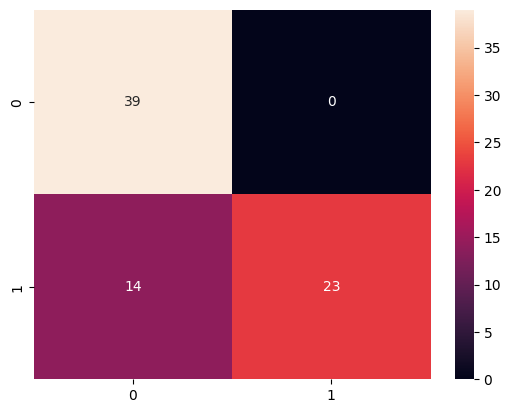

In [122]:
ac = accuracy_score(y_test,rfc .predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,rfc .predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [129]:
def KMer2(text, k):
    kmers_count = {}
    s=0
    i=0
    while(i<len(text) - k + 1):
        kmer = text[i:i + k]
        s +=1
        if kmer in kmers_count:
            kmers_count[kmer] += 1
        else:
            kmers_count[kmer] = 1
        i+=3
        
    for key, value in kmers_count.items():
        kmers_count[key]=value/s
        
    return kmers_count

In [136]:
file_path = 'Arabidopsis_thaliana_BHLH_gene_Family.fasta'
fasta = read_fasta_file(file_path)

ids=[]
for id in fasta:
   ids.append(id['id'])


sequences =[]
y=[]
for seq in fasta:
    sequences.append(seq['sequence'])
    y.append(1)

file_path = 'Arabidopsis_thaliana_CYP_gene_Family.fa'
fasta = read_fasta_file(file_path)

for seq in fasta:
    sequences.append(seq['sequence'])
    y.append(0)


for id in fasta:
   ids.append(id['id'])



kmer_result=[]
for i in range(len(sequences)):
    kmer_result.append(KMer(sequences[i], 3))
  #  kmer_result[i].update(KMer2(sequences[i], 6))
    
print(kmer_result)

v = DictVectorizer(sparse=False)

features = v.fit_transform(kmer_result)
feature_names = v.get_feature_names_out()

#y = is_bhlh_protein(ids)
x = pd.DataFrame(features,columns=feature_names)
x.to_csv('kmer_features.csv', index=False)
x.rename(index=dict(zip(x.index, ids)), inplace=True)
x

[{'AAG': 0.02832244008714597, 'AGT': 0.018300653594771243, 'GTT': 0.02309368191721133, 'TTT': 0.04357298474945534, 'TTC': 0.02483660130718954, 'TCT': 0.025272331154684097, 'CTC': 0.017429193899782137, 'TCA': 0.018300653594771243, 'CAC': 0.00784313725490196, 'ACG': 0.005664488017429194, 'CGT': 0.00522875816993464, 'CTT': 0.023529411764705882, 'TTA': 0.018300653594771243, 'TAA': 0.015250544662309368, 'AAT': 0.024400871459694988, 'ATT': 0.022657952069716776, 'TCG': 0.010021786492374727, 'CGC': 0.0017429193899782135, 'GCC': 0.00392156862745098, 'CCG': 0.006535947712418301, 'CGG': 0.010893246187363835, 'GGA': 0.01568627450980392, 'GAA': 0.033115468409586055, 'AAA': 0.02875816993464052, 'AAC': 0.018736383442265796, 'ACA': 0.013507625272331155, 'CAA': 0.022657952069716776, 'ATC': 0.0196078431372549, 'CAT': 0.011328976034858388, 'TCC': 0.015250544662309368, 'CCC': 0.00392156862745098, 'GGC': 0.004793028322440087, 'GCG': 0.006535947712418301, 'CGA': 0.010893246187363835, 'ACT': 0.01830065359477

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
AT1G51140.1 | Symbols: | basic helix-loop-helix (bHLH) DNA-binding superfamily protein | chr1:18943457-18945753 REVERSE LENGTH=2297,0.028758,0.018736,0.028322,0.024401,0.013508,0.008715,0.005664,0.018301,0.029630,0.012636,...,0.010022,0.025272,0.026144,0.013072,0.014815,0.016993,0.018301,0.024837,0.026144,0.043573
AT1G73830.1 | Symbols: BEE3 | BR enhanced expression 3 | chr1:27759975-27761447 FORWARD LENGTH=1473,0.042148,0.015636,0.020394,0.040789,0.014956,0.004759,0.005438,0.015636,0.031271,0.007478,...,0.010197,0.035350,0.019714,0.008158,0.010877,0.010197,0.031271,0.036030,0.012916,0.062542
"AT1G09530.1 | Symbols: PIF3, POC1, PAP3 | phytochrome interacting factor 3 | chr1:3076582-3079539 FORWARD LENGTH=2958",0.030108,0.019959,0.025034,0.021313,0.013532,0.008119,0.007442,0.016915,0.024357,0.011502,...,0.010487,0.032476,0.019959,0.015223,0.017591,0.022327,0.016238,0.029770,0.026725,0.046008
"AT1G49770.1 | Symbols: RGE1, ZOU | basic helix-loop-helix (bHLH) DNA-binding superfamily protein | chr1:18424578-18426782 FORWARD LENGTH=2205",0.037222,0.016795,0.019065,0.029051,0.018157,0.009532,0.005447,0.011802,0.022696,0.006809,...,0.005901,0.024966,0.019065,0.012710,0.011348,0.020881,0.031321,0.027236,0.019519,0.059464
AT1G68810.1 | Symbols: | basic helix-loop-helix (bHLH) DNA-binding superfamily protein | chr1:25861123-25863120 FORWARD LENGTH=1998,0.034068,0.019539,0.033567,0.018537,0.022044,0.011523,0.009519,0.012024,0.036072,0.014028,...,0.009018,0.028056,0.017535,0.006012,0.013026,0.019539,0.018537,0.019539,0.020541,0.049098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AT5G14400.1 | Symbols: CYP724A1 | cytochrome P450, family 724, subfamily A, polypeptide 1 | chr5:4643521-4646382 FORWARD LENGTH=2862",0.047203,0.017832,0.022378,0.036364,0.018182,0.006294,0.005944,0.014685,0.020629,0.008392,...,0.006294,0.020280,0.016434,0.008741,0.013986,0.024126,0.029720,0.022727,0.024126,0.065385
"AT5G58860.1 | Symbols: CYP86A1, CYP86 | cytochrome P450, family 86, subfamily A, polypeptide 1 | chr5:23765814-23768049 REVERSE LENGTH=2236",0.029991,0.023724,0.020143,0.017010,0.016562,0.013429,0.020591,0.015667,0.020143,0.010743,...,0.013876,0.024172,0.021934,0.009400,0.016115,0.016115,0.023724,0.023277,0.023277,0.043420
"AT5G42650.1 | Symbols: AOS, CYP74A, DDE2 | allene oxide synthase | chr5:17097595-17099395 REVERSE LENGTH=1801",0.028349,0.014452,0.023902,0.021679,0.010561,0.016676,0.016676,0.009450,0.023902,0.016676,...,0.017232,0.021679,0.013897,0.004447,0.012785,0.015008,0.019455,0.024458,0.018344,0.041134
"AT5G05690.1 | Symbols: CPD, CYP90A, CYP90, CBB3, DWF3, CYP90A1 | Cytochrome P450 superfamily protein | chr5:1702688-1706780 REVERSE LENGTH=4093",0.042532,0.016866,0.021022,0.023711,0.014911,0.011000,0.007822,0.014422,0.018577,0.009533,...,0.006111,0.030066,0.022244,0.011244,0.013444,0.017844,0.027622,0.028599,0.027133,0.055488


### Cross validation 

In [137]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train) 

y_pred = dt_classifier.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6842105263157895
Precision: 0.7096774193548387
Recall: 0.5945945945945946
F1-score: 0.6470588235294118


In [125]:
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
cv_scores

array([0.72131148, 0.78688525, 0.62295082, 0.63934426, 0.7       ])

### Grid search

In [127]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

if 'ID' in X_train.columns:
    X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
else:
    print("Column 'ID' not found in X_train.")

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],  
}

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
#print(grid.best_estimator_)

Column 'ID' not found in X_train.
0.7498907103825136
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10}
